# Amazon Sales Report

####### This project analyzes the Amazon Sales Report to understand sales trends, product performance, customer behavior, and geographical distribution. The analysis identifies top-selling products, high-demand sizes, effective fulfillment methods, and key revenue-generating regions. Based on these insights, data-driven recommendations are provided to improve sales strategies, optimize inventory management, enhance customer experience, and drive overall business growth.

## Import Libraries & Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


###  Load dataset

In [2]:
file_path = r"C:\Users\ritu6\Downloads\Amazon Sale Report.csv"
df = pd.read_csv(file_path)

### Basic Data Understanding

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
df.describe()


,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [7]:
# Check missing values
df.isnull().sum()


index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

## Data Cleaning

In [22]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows with missing Amount
df = df[df['Amount'].notna()]


## Sales Overview Analysis

### Total Sales & Orders 

In [9]:
total_sales = df['Amount'].sum()
total_orders = df['Order ID'].nunique()

print("Total Sales:", total_sales)
print("Total Orders:", total_orders)


Total Sales: 78496786.39
Total Orders: 112887


### Sales Trend Over Time

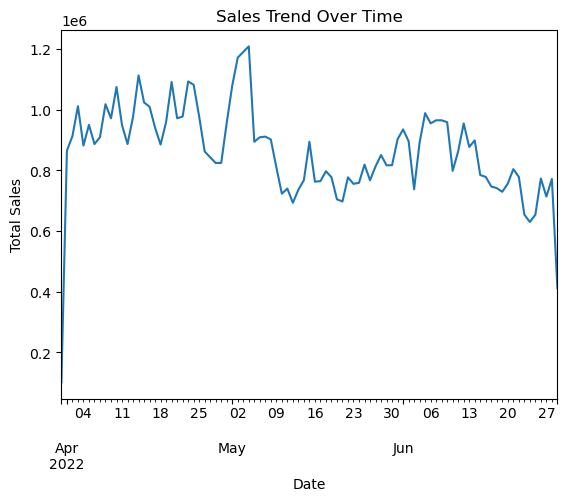

In [10]:
sales_trend = df.groupby('Date')['Amount'].sum()

plt.figure()
sales_trend.plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


## Product Analysis

### Sales by Category

In [27]:
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
category_sales


Category
T-shirt     39154132.17
Shirt       21269768.70
Blazzer     11208506.12
Trousers     5341305.30
Perfume       789419.66
Wallet        458408.18
Socks         150397.50
Shoes         123933.76
Watch            915.00
Name: Amount, dtype: float64

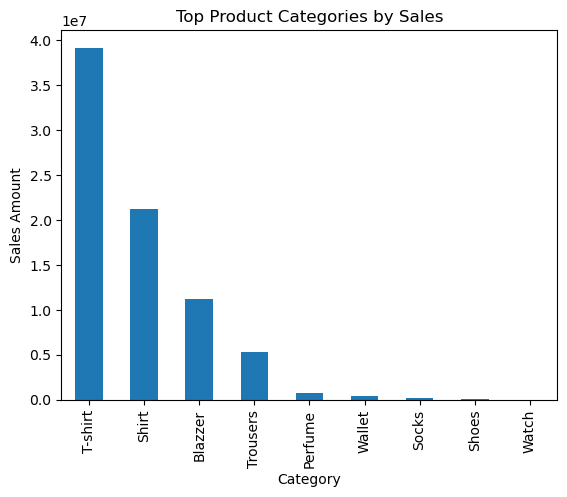

In [28]:
plt.figure()
category_sales.head(10).plot(kind='bar')
plt.title("Top Product Categories by Sales")
plt.ylabel("Sales Amount")
plt.show()


### Quantity Sold by Size

In [29]:
size_quantity = df.groupby('Size')['Qty'].sum().sort_values(ascending=False)
size_quantity


Size
M       20096
L       19652
XL      18587
XXL     16200
S       15004
3XL     13328
XS       9815
Free     2050
6XL       687
5XL       512
4XL       398
Name: Qty, dtype: int64

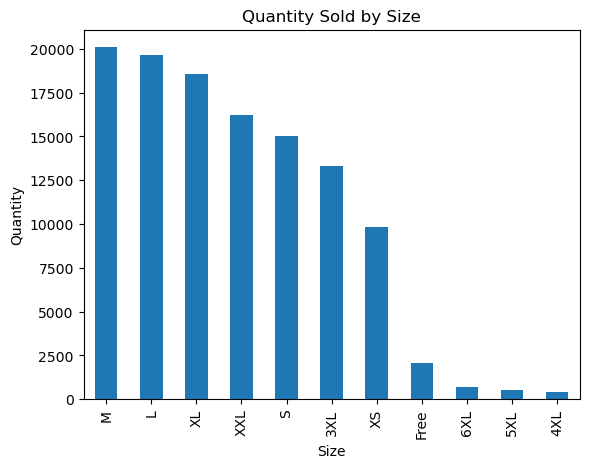

In [30]:
plt.figure()
size_quantity.plot(kind='bar')
plt.title("Quantity Sold by Size")
plt.ylabel("Quantity")
plt.show()


### Top category by Quantity

In [12]:
top_products = df.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(10)
top_products


Category
T-shirt     45164
Shirt       44903
Blazzer     13930
Trousers     9885
Perfume      1051
Wallet        844
Socks         397
Shoes         152
Watch           3
Name: Qty, dtype: int64

## Fulfillment Analysis

In [33]:
fulfillment_sales = df.groupby('Fulfilment')['Amount'].sum()
fulfillment_sales


Fulfilment
Amazon      54262165.00
Merchant    24234621.39
Name: Amount, dtype: float64

In [17]:
# Fulfillment performance
fulfillment_kpis = (
    df.groupby('Fulfilment')
      .agg(
          orders=('Order ID', 'nunique'),
          revenue=('Amount', 'sum'),
          avg_order_value=('Amount', 'mean')
      )
      .sort_values('revenue', ascending=False)
)
fulfillment_kpis

,orders,revenue,avg_order_value
Fulfilment,,,
Amazon,78211,54262165.00,649.519583
Merchant,34676,24234621.39,646.653184


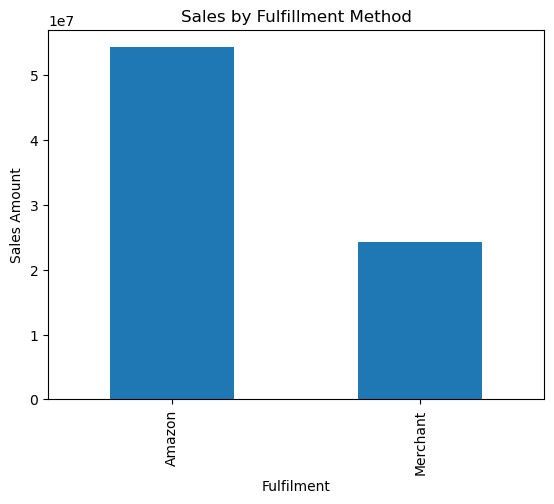

In [34]:
plt.figure()
fulfillment_sales.plot(kind='bar')
plt.title("Sales by Fulfillment Method")
plt.ylabel("Sales Amount")
plt.show()


## Customer Segmentation

### Orders by State

In [36]:
orders_by_state = df.groupby('ship-state')['Order ID'].nunique().sort_values(ascending=False)
orders_by_state.head(10)


ship-state
MAHARASHTRA       19648
KARNATAKA         15274
TAMIL NADU         9883
TELANGANA          9748
UTTAR PRADESH      9390
DELHI              5984
KERALA             5699
WEST BENGAL        5251
ANDHRA PRADESH     4632
HARYANA            3929
Name: Order ID, dtype: int64

### Sales by City

In [14]:
sales_by_city = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)
sales_by_city.head(10)


ship-city
BENGALURU    6836614.65
HYDERABAD    4941790.25
MUMBAI       3696704.04
NEW DELHI    3608277.78
CHENNAI      3098745.74
PUNE         2337978.18
KOLKATA      1412815.87
GURUGRAM     1220562.74
THANE        1003878.29
LUCKNOW       933926.34
Name: Amount, dtype: float64

## Geographical Analysis

### State-wise Sales

In [15]:
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
state_sales.head(10)


ship-state
MAHARASHTRA       13318966.38
KARNATAKA         10465387.03
TELANGANA          6909670.08
UTTAR PRADESH      6814126.08
TAMIL NADU         6510503.73
DELHI              4228503.97
KERALA             3821997.58
WEST BENGAL        3503223.44
ANDHRA PRADESH     3214859.86
HARYANA            2879146.99
Name: Amount, dtype: float64

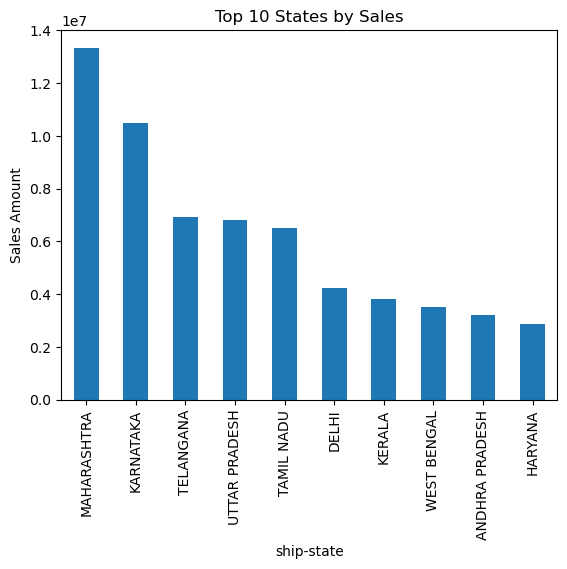

In [42]:
plt.figure()
state_sales.head(10).plot(kind='bar')
plt.title("Top 10 States by Sales")
plt.ylabel("Sales Amount")
plt.show()


### City-wise Sales

In [16]:
sales_by_city = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)
sales_by_city.head(10)


ship-city
BENGALURU    6836614.65
HYDERABAD    4941790.25
MUMBAI       3696704.04
NEW DELHI    3608277.78
CHENNAI      3098745.74
PUNE         2337978.18
KOLKATA      1412815.87
GURUGRAM     1220562.74
THANE        1003878.29
LUCKNOW       933926.34
Name: Amount, dtype: float64

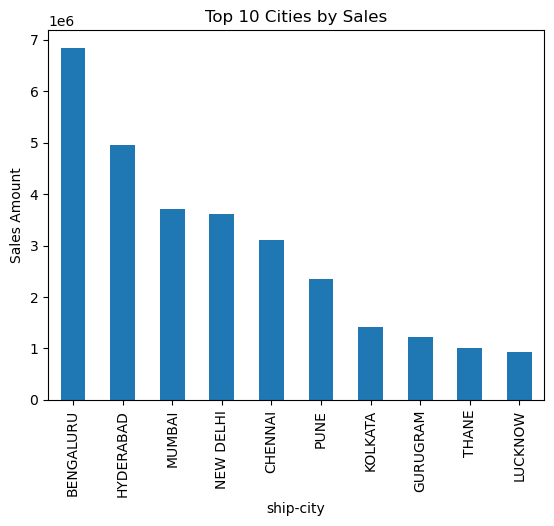

In [41]:
plt.figure()
city_sales.head(10).plot(kind='bar')
plt.title("Top 10 Cities by Sales")
plt.ylabel("Sales Amount")
plt.show()


## Business Insights (Code-based KPIs)

In [43]:
avg_order_value = df['Amount'].mean()
print("Average Order Value:", avg_order_value)


Average Order Value: 648.6319205248763


In [44]:
top_state = state_sales.idxmax()
print("Top Performing State:", top_state)


Top Performing State: MAHARASHTRA


In [45]:
top_category = category_sales.idxmax()
print("Top Performing Category:", top_category)


Top Performing Category: T-shirt


## Peak Sales Periods (Timing Optimization)

In [47]:
# Daily sales trend
daily_sales = df.groupby('Date')['Amount'].sum().sort_values(ascending=False)
daily_sales.head(10)  # Top sales days


Date
2022-05-04    1209364.17
2022-05-03    1190672.59
2022-05-02    1172327.06
2022-04-14    1113487.56
2022-04-23    1093536.62
2022-04-20    1091926.41
2022-04-24    1082483.95
2022-05-01    1079957.52
2022-04-10    1075234.03
2022-04-15    1024542.13
Name: Amount, dtype: float64

In [48]:
# Monthly trend
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum().sort_values(ascending=False)
monthly_sales


Month
2022-04    28742816.41
2022-05    26226476.75
2022-06    23425809.38
2022-03      101683.85
Freq: M, Name: Amount, dtype: float64

## Actionable Recommendations (Data-Backed Flags)

In [60]:
size_demand = df.groupby('Size')['Qty'].sum().sort_values(ascending=False)
category_contribution = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
top_states = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
slow_products = df.groupby('Size')['Qty'].sum().sort_values().head(10)

fulfillment_kpis = (
    df.groupby('Fulfilment')
      .agg(
          orders=('Order ID', 'nunique'),
          revenue=('Amount', 'sum'),
          avg_order_value=('Amount', 'mean')
      )
      .sort_values('revenue', ascending=False)
)

recommendations = {
    "Increase inventory for top categories": category_contribution.index[:3].tolist(),
    "Focus on high-demand sizes": size_demand.index[:3].tolist(),
    "Promote in top states": top_states.index.tolist(),
    "Use best fulfillment method": fulfillment_kpis.index[0],
    "Reduce stock for slow products": slow_products.index.tolist()
}

recommendations


{'Increase inventory for top categories': ['T-shirt', 'Shirt', 'Blazzer'],
 'Focus on high-demand sizes': ['M', 'L', 'XL'],
 'Promote in top states': ['MAHARASHTRA',
  'KARNATAKA',
  'TELANGANA',
  'UTTAR PRADESH',
  'TAMIL NADU',
  'DELHI',
  'KERALA',
  'WEST BENGAL',
  'ANDHRA PRADESH',
  'HARYANA'],
 'Use best fulfillment method': 'Amazon',
 'Reduce stock for slow products': ['4XL',
  '5XL',
  '6XL',
  'Free',
  'XS',
  '3XL',
  'S',
  'XXL',
  'XL',
  'L']}

## Optional Visuals (Quick Decision Charts)

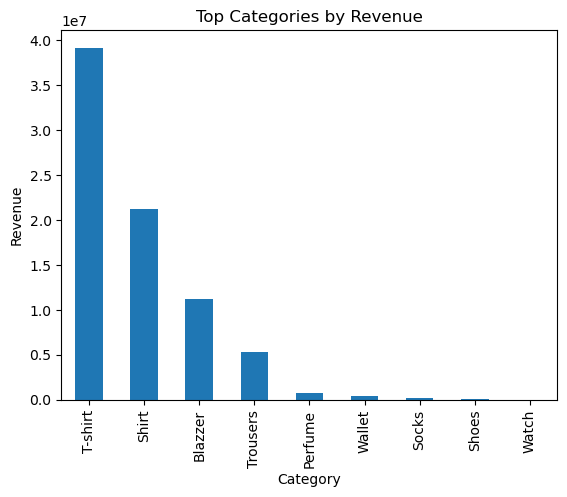

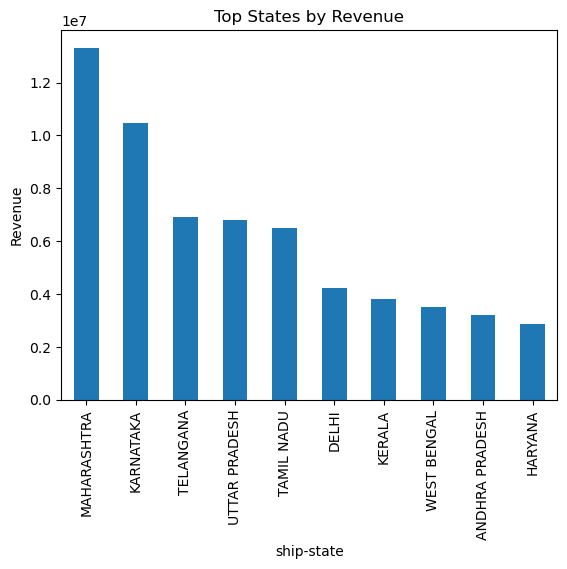

In [61]:
# Top categories
category_contribution.head(10).plot(kind='bar')
plt.title("Top Categories by Revenue")
plt.ylabel("Revenue")
plt.show()

# Top states
top_states.plot(kind='bar')
plt.title("Top States by Revenue")
plt.ylabel("Revenue")
plt.show()


## Final Result

####### The Amazon sales data analysis successfully delivered meaningful business insights by identifying key sales trends, high-performing products, customer preferences, and major revenue-generating regions. The results showed that a small number of product categories, styles, and sizes contribute most of the revenue, while sales are highly concentrated in specific states and cities. Fulfillment analysis highlighted the most effective delivery method in terms of revenue and order volume.

Overall, the analysis enabled data-driven recommendations to optimize sales strategies, improve inventory planning, enhance fulfillment efficiency, and strengthen customer experience. These outcomes support better operational decision-making and provide a strong foundation for sustainable revenue growth.